# Evolution of Einstein's equations

# Initial data , setting length of the domain and discretization


# Parameters

In [140]:
m = 1
A = 0.1256#0.0001#17#0.125#0.12699485911198283#0.04
run = 1

twod=true
zeroformat=false

## old
"""Agrid=0.35
kgrid=0.7
mgrid=0.5#0.55
fgrid=5"""

# new grid 2
Agrid=0.42
kgrid=0.5
mgrid=0.5#0.55
fgrid=4.5

# grid 3
Agrid=0.44
kgrid=0.47
mgrid=0.5#0.55
fgrid=4.0

#grid 4
Agrid=0.58
kgrid=0.47
mgrid=0.51#0.55
fgrid=1.0

1.0

In [141]:
function compactify(r)
    return r/(1+r)
end

function uncompactify(x)
    return x/(1-x)
end

uncompactify (generic function with 1 method)

Choose your grid

In [142]:
global compactified=true
global loggrid=true

global bisection=true

true

In [143]:
using Quadmath, Printf

res=m;
N=2.0^m*100.0/2.0

if compactified==true
    Xf=1.0
else
    Xf=10.0#Float128(1.0);
end

dx=Xf/N#Float128(Xf/N);
if loggrid==false
    dt=0.5*round(dx,digits=10)#0.5*dx#round(dx,digits=10);#dx
else
    dt=0.1*round(dx,digits=10)
end
Nt=N
Tf=Nt*dt; #final time
#print(Tf)

In [144]:
iter=1

1

In [145]:
print(N)

100.0

In [146]:
global dir = "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

# Grid

In [147]:
using Printf
include("./ScalarField.jl");
#include("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/myspline.jl");

In [148]:

if loggrid==true
    ori=(tan(-mgrid/Agrid)/fgrid+kgrid)#0.0#Float128(0.0)#0.0;
    Xf=(tan((1-mgrid)/Agrid)/fgrid+kgrid)
else
    ori=0.0
    Xf=1.0
end

dx=(Xf-ori)/N

initX1 = nothing

initX1=range(ori, stop=Xf, step=dx);
#initX1=create_range(ori,Xf,dx,N)
#initX = range(round(ori-3.0*dx,digits=10), stop=Xf+3.0*dx, step=dx)
#initX=create_range(ori-3.0*dx,Xf+3.0*dx,dx,N+6)

L=length(initX1)+6;
println("step size is  ", dx)
println("the time step is ", dt)

initX=[ori-3*dx; ori-2*dx; ori-dx; collect(initX1); Xf+dx; Xf+2*dx; Xf+3*dx];

step size is  0.02334494000960994
the time step is 0.001


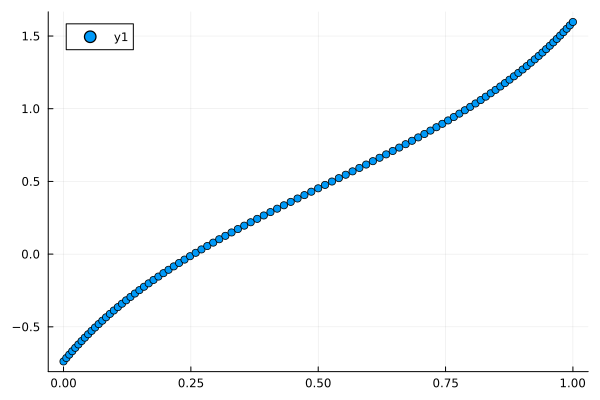

In [149]:
using Plots
scatter(inverse.(initX1), (initX1))#, ylim=[-1,1],xlim=[0,1])

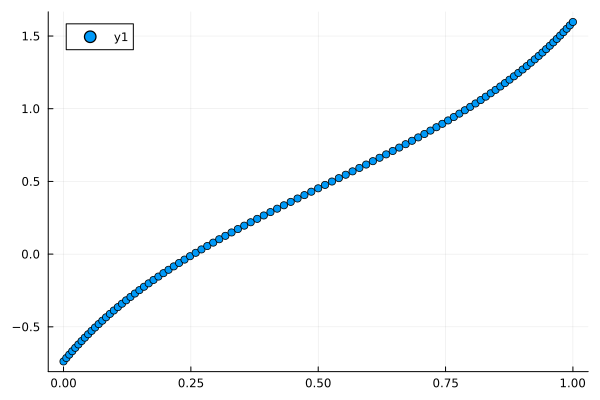

In [150]:
using Plots
scatter(inverse.(initX1), (initX1))#, ylim=[-1,1],xlim=[0,1])

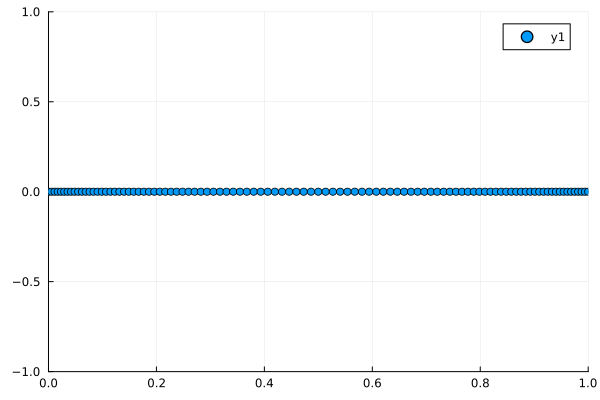

In [151]:
using Plots
scatter(inverse.(initX1), zeros(length(initX1)), ylim=[-1,1],xlim=[0,1])

# Initial data of m β Ψ and Ψ,x

In [152]:
using Dierckx


####

initm=zeros(L)
initbeta=zeros(L)
initpsi=zeros(L)
initderpsi=zeros(L)

state_array=[initm initbeta initpsi initderpsi initX];

#PSI
r0=0.7
sigma=0.3


#PSI,R FROM PSI
initderpsi[4:L-3] = init_gaussian_der(initX1,r0,sigma,A)

state_array[:,4] = initderpsi
state_array=ghost(state_array)

####
if loggrid==true
    derpsi_func = Spline1D((initX[4:L-3]), state_array[4:L-3,4],  k=4);
else
    derpsi_func = Spline1D(initX[4:L-3], state_array[4:L-3,4],  k=4);
end;

In [153]:
#evalInterval(Float128.([0.1]),initX,coef,3);

In [154]:
y0=[0.0, 0.0, 0.0]#Float128.([0.0 0.0 0.0])

state_array[4:L-3,1:3] = n_rk4wrapper(RHS,y0,initX[4:L-3],0,derpsi_func,state_array[:,:]);

state_array = ghost(state_array);

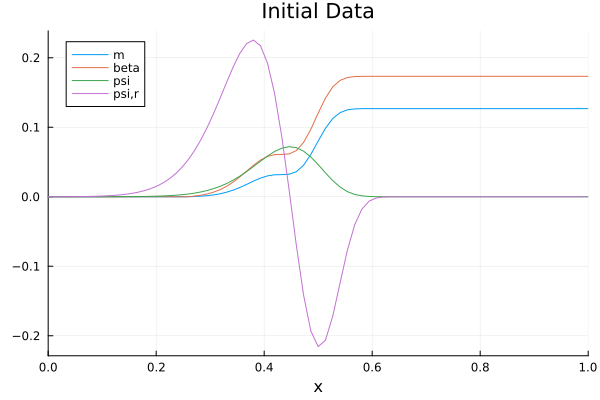

In [155]:
using Plots #showing initial data and the initial status of the horizon finder
plot(inverse(initX[4:L-3]), state_array[4:L-3,1:4], xaxis="x",title="Initial Data", labels=["m" "beta" "psi" "psi,r"],xlim=[0,1])

In [156]:
monitor_ratio=zeros(L)
global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]));

# Defining the initial state array for the evolution m β Ψ and Ψ,x

In [157]:
using Tables

monitor_ratio=zeros(L)
if compactified==false
    global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4]
else
    if loggrid==false
        global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ initX[5:L-4] .* (1 .- initX[5:L-4])
    else
        global monitor_ratio[5:L-4] = 2 .* state_array[5:L-4,1] ./ inverse(initX[5:L-4]) .* (1 .- inverse(initX[5:L-4]))
    end
end

global files=["m", "beta", "psi", "derpsi", "monitorratio"]

#print_muninn(files, t, state_array[:,1:5],res,"a")
print_muninn(files, 0, [state_array[:,1:4] monitor_ratio],res,"w",state_array[:,5])

In [158]:
time=0.0
criticality=0.0
explode=0.0
evol_stats = [criticality A sigma r0 time explode run]
global monitor_ratio = zeros(L);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=true, header=["criticality", "A", "sigma", "r0", "time", "explode", "run"])

In [159]:
ginit=speed(initX,state_array[:,1],state_array[:,2])
println(update_dt(initX,state_array[:,1],state_array[:,2],dx)/dt)

LoadError: MethodError: no method matching update_dt(::Vector{Float64}, ::Vector{Float64}, ::Vector{Float64}, ::Float64)
[0mClosest candidates are:
[0m  update_dt(::Any, ::Any, ::Any, ::Any, [91m::Any[39m) at ~/Desktop/MSc Thesis/Git/ScalarField/newgrid/ScalarField.jl:173

In [160]:
using Base.Threads
Threads.nthreads()

4

In [161]:
#global dt=5e-5

 ## Time evolution

fixed grid

In [162]:
finaltime=5.0
evol_stats, T_interp = timeevolution(state_array,finaltime,run);
#CSV.write(dir*"/timearray$res.csv", Tables.table(T_interp), writeheader=false);
#CSV.write(dir*"/parameters.csv", Tables.table(evol_stats), writeheader=false);



iteration 100 dt is 0.010449247071344208, t=1.0467954537197375 speed is 0.2665080728480794, dx/dt=2.234126521290764


iteration 200 dt is 0.0020934802087383434, t=2.025725385549569 speed is 0.26604585876411757, dx/dt=11.151258995507293


iteration 300 dt is 0.010473346161807378, t=2.771373859980037 speed is 0.2658948397841183, dx/dt=2.2289858130289586


iteration 400 dt is 0.010473354890470795, t=3.818709229356186 speed is 0.2658946181830568, dx/dt=2.2289839553561186


iteration 500 dt is 0.010473355035914306, t=4.866044728934551 speed is 0.2658946144905775, dx/dt=2.228983924402212


#### 

 ## Movie of the evolution, apparent horizon formation for 0.0492<A*<0.04925

In [460]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 18400:1:18400
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File("/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
    
    scatter!(initX1, [plot1], labels=["monitor ratio"])# ylim=[0, 1],xlim=[0, 1])# |> display 

    end

gif(anim, "anim_res$res.gif", fps = 1500)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/muninnDATA/res1/monitor_ratio18400.csv" is not a valid file or doesn't exist

In [420]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 710:710
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot1=functions3.Column1[4:L-3];
        plot2=functions3.Column2[4:L-3];
        plot3=functions3.Column3[4:L-3];
        plot4=functions3.Column4[4:L-3];
        plot5=functions3.Column5[4:L-3];
    temp=round(n*dt,digits=2)
    plot!(initX1, [plot1 plot2 plot3 plot4], labels=["m" "beta" "psi" "psi,x"], title="$temp", ylim=[-0.01, 0.01],xlim=[0.0, 0.1])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/moniter_ratio14000.csv" is not a valid file or doesn't exist

In [750]:
using Plots, CSV, DataFrames
import GR
anim = @animate for n in 8000:100:10000
    
    
    IJulia.clear_output(true)
    
    functions3=DataFrame(CSV.File(dir*"/res$res/time_step$n.csv",header=false, delim=","))
    plot()
        plot6=functions3.Column1[4:L-3] .* 2 .* (1 .- functions3.Column5[4:L-3]) ./functions3.Column5[4:L-3];
    
    
    plot!(initX1, plot6, labels=["monitor ratio"], ylim=[-1.3, 0.6],xlim=[0.0, 0.3])#, xlim=[0, 0.1])# |> display 
    
    end

gif(anim, "N2000_A$A.gif", fps = 15000)

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/time_step8000.csv" is not a valid file or doesn't exist

In [751]:
dir

"/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA"

LoadError: ArgumentError: "/home/rita13santos/Desktop/MSc Thesis/Git/ScalarField/DATA/res1/monitor_ratio8200.csv" is not a valid file or doesn't exist

Sanity check for der func

In [207]:
array=init_gaussian(originalX,0.7,0.3,0.01)
arrayloggrid=init_gaussian(initX,0.7,0.3,0.01);

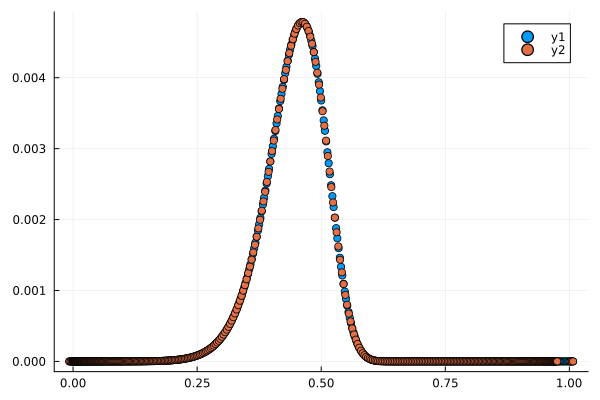

In [209]:
scatter([originalX, initX], [array, arrayloggrid])

In [210]:
aux=zeros(L)

loggrid=false
for i in 4:L-3
    aux[i]=Dertest(array,i,originalX)
end
x1=originalX
y1=aux


loggrid=true
for i in 4:L-3
    aux[i]=Dertest(arrayloggrid,i,initX)
end
x2=initX
y2=aux;

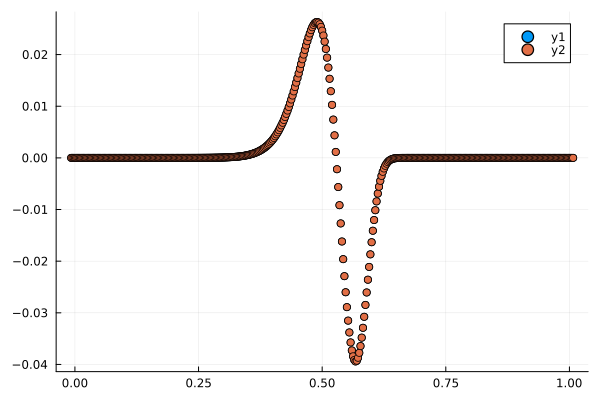

In [417]:
scatter([x1,x1],[y1,y2])